# 大模型微调技术

- 微调的基本流程
- 微调策略分类
  - 全参数微调（Full Fine-tuning）
  - 参数高效微调（PEFT）
    - LoRA（Low-Rank Adaptation）
    - QLoRA
    - DoRA（Weight-Decomposed Low-Rank Adaptation）
    - Adapter微调
  - 半微调（Half Fine-tuning）


## 1. 微调的基本流程

微调的基本流程包括以下几个步骤：

1. **准备阶段**：确定微调目标和收集相关数据集
2. **训练环境设置**：配置硬件资源、选择适当的训练框架
3. **微调策略选择**：全参数微调或参数高效微调
4. **执行微调**：使用特定数据集进行模型训练
5. **评估与验证**：使用评估指标测试模型性能
6. **部署应用**：将微调后的模型部署到生产环境


### 1.1 准备阶段

- 确定微调目标：明确微调的目标，例如提高模型在特定任务上的性能或适应特定领域。
- 收集相关数据集：收集与微调目标相关的数据集，确保数据集的质量和多样性。
- 数据预处理：对数据进行预处理，包括数据清洗、数据增强等，以提高模型的泛化能力。



### 1.2 训练环境设置
 
- **硬件资源配置**：根据模型规模选择适当的GPU/TPU资源，确保有足够的显存和计算能力。
- **训练框架选择**：选择适合的深度学习框架，如PyTorch、TensorFlow或专门的大模型训练框架如DeepSpeed、Accelerate等。
- **分布式训练设置**：对于大型模型，配置分布式训练环境，包括数据并行、模型并行或流水线并行等策略。
- **内存优化**：设置梯度检查点(gradient checkpointing)、混合精度训练(mixed precision)等技术减少内存占用。
- **训练监控**：配置训练日志和可视化工具，如TensorBoard、Weights & Biases等，实时监控训练进度。


### 1.3 微调策略选择

微调策略的选择对于模型优化至关重要，主要包括以下几种策略：

#### 1.3.1 全参数微调（Full Fine-tuning）

- **原理**：更新模型的所有参数
- **优势**：可以实现最全面的模型适应性
- **挑战**：计算资源需求高，容易过拟合，优化难度大
- **适用场景**：拥有充足计算资源且有大量领域数据的情况

#### 1.3.2 参数高效微调（PEFT）

- **LoRA（Low-Rank Adaptation）**：通过低秩矩阵分解技术减少需要训练的参数数量
- **QLoRA**：结合量化技术和LoRA，进一步降低内存需求
- **DoRA**：在LoRA基础上分解权重的幅度和方向，提供更好的性能和稳定性
- **Adapter微调**：在预训练模型中插入小型可训练模块，便于多任务学习

#### 1.3.3 半微调（Half Fine-tuning）

- **原理**：只更新模型的部分层（通常是后半部分层）
- **优势**：比全参数微调更高效，比PEFT方法性能可能更好
- **实现方式**：冻结前N层，只训练后M层

### 1.4 执行微调

执行微调是将选定的微调策略应用于预训练模型的过程，主要包括以下步骤：

- **数据加载与批处理**：构建高效的数据加载器，设置合适的批次大小和数据混洗策略
- **学习率设置**：通常使用较小的学习率（比预训练阶段低1-2个数量级），可配合学习率预热和衰减策略
- **优化器选择**：常用AdamW、Lion等优化器，针对大模型微调进行参数调整
- **训练循环实现**：包括前向传播、损失计算、反向传播和参数更新等步骤
- **中间检查点保存**：定期保存模型检查点，防止训练中断导致进度丢失
- **早停策略**：设置验证集评估和早停机制，避免过拟合
- **梯度累积**：对于显存受限情况，可使用梯度累积技术增大等效批次大小


### 1.5 评估与验证

评估和验证是微调过程中的关键步骤，确保模型达到预期性能并能够泛化到新数据。主要包括以下内容：

- **评估指标选择**：
  - **通用指标**：准确率(Accuracy)、精确率(Precision)、召回率(Recall)、F1分数
  - **生成任务指标**：BLEU、ROUGE、METEOR、BERTScore、人工评估
  - **特定任务指标**：如问答任务的精确匹配率、SQUAD评分等

- **评估数据集准备**：
  - **验证集**：用于训练过程中模型调优，通常占总数据的10-20%
  - **测试集**：用于最终模型评估，必须与训练和验证集分离
  - **挑战性测试集**：设计特殊用例测试模型的鲁棒性和特定能力

- **多维度评估**：
  - **基准测试**：与标准基准模型或业界SoTA模型比较
  - **表现稳定性**：通过不同种子或初始化条件评估模型的稳定性
  - **推理速度**：评估模型的推理延迟和吞吐量
  - **安全性评估**：测试模型对有害请求的抵抗能力
  - **公平性评估**：检查模型在不同人口统计学群体上的表现差异

- **误差分析**：
  - **错误模式识别**：分析模型常见的失败模式和错误类型
  - **困难案例研究**：深入研究模型表现不佳的特定案例
  - **混淆矩阵分析**：对分类任务进行错误分布分析

- **人机评估**：
  - **人类评价者标准**：建立清晰的评分标准和规则
  - **A/B测试**：让人类评估者比较不同模型版本的输出
  - **Turing测试**：评估模型输出与人类输出的区分难度
// ... existing code ...

### 1.6 部署应用

微调后的大模型需要有效部署到生产环境中，以便最终用户使用。主要包括以下方面：

- **模型优化**：
  - **量化**：将模型权重从FP32/FP16转换为INT8/INT4等低精度格式，减少内存占用
  - **剪枝**：移除模型中不重要的权重或神经元，减小模型体积
  - **知识蒸馏**：将大模型知识迁移到更小的模型中，提高推理效率
  - **模型合并**：合并多个微调模型或与基础模型合并（如LoRA合并）

- **推理优化**：
  - **批处理推理**：合并多个请求进行批量处理，提高吞吐量
  - **KV缓存**：缓存注意力机制的键值对，加速自回归生成
  - **推理加速库**：使用ONNX Runtime、TensorRT、vLLM等专业推理库
  - **动态批处理**：根据负载动态调整批处理大小

- **部署架构**：
  - **服务化部署**：将模型封装为REST API或gRPC服务
  - **边缘部署**：将优化后的模型部署到边缘设备或客户端
  - **混合部署**：结合云端和边缘计算的混合架构
  - **容器化部署**：使用Docker、Kubernetes管理模型服务

- **监控与维护**：
  - **性能监控**：跟踪延迟、吞吐量、资源利用率等指标
  - **质量监控**：监控模型输出质量，检测性能退化
  - **A/B测试**：比较不同模型版本的实际效果
  - **灰度发布**：逐步将流量迁移到新模型版本

- **安全与合规**：
  - **输入过滤**：防止有害或恶意输入
  - **输出审查**：过滤不适当或有害的模型输出
  - **访问控制**：实施适当的认证和授权机制
  - **隐私保护**：确保用户数据安全和隐私合规


## 2. 微调策略分类

### 2.1 全参数微调

全参数微调（Full Fine-tuning）是指在预训练模型的基础上更新所有参数的技术。

#### 基本原理

全参数微调通过梯度下降算法更新模型的所有权重参数，使模型适应特定任务或领域。这种方法允许模型进行最全面的适应性调整。

#### 优势

- **性能最优**：理论上能达到最佳的任务适应性能
- **全面调整**：可以调整模型的所有层次和参数
- **适应性强**：对于差异较大的下游任务有更好的适应能力

#### 挑战

- **计算资源需求高**：需要强大的GPU/TPU资源
- **内存占用大**：需要存储完整的模型参数及其梯度
- **过拟合风险**：容易在小数据集上过拟合
- **训练不稳定**：大模型全参数训练容易出现梯度消失或爆炸

#### 实施步骤

1. **准备充足的计算资源**：高性能GPU/TPU集群
2. **数据准备**：收集高质量、规模适当的领域数据
3. **超参数选择**：较小的学习率、适当的批次大小
4. **训练监控**：密切监控损失曲线和验证性能
5. **正则化技术**：应用dropout、权重衰减等防止过拟合

#### 适用场景

- 拥有充足计算资源的机构或企业
- 有大量领域特定数据的应用场景
- 对模型性能要求极高的关键业务



In [ ]:
# 全参数微调示例代码
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_dataset

# 1. 加载预训练模型和分词器
model_name = "gpt2"  # 以GPT-2为例
tokenizer = AutoTokenizer.from_pretrained(model_name) # AutoTokenizer 是用于分词的类
model = AutoModelForCausalLM.from_pretrained(model_name) # AutoModelForCausalLM 是用于因果语言模型的模型类

# 2. 准备数据集
dataset = load_dataset("wikitext", "wikitext-2-raw-v1") # wikitext-2-raw-v1 是wikitext数据集的一个版本

# 3. 数据预处理函数
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# 应用预处理
tokenized_datasets = dataset.map(tokenize_function, batched=True) # batched=True 表示将数据集分成小批次进行处理
train_dataset = tokenized_datasets["train"] # train_dataset 是训练集
eval_dataset = tokenized_datasets["validation"] # eval_dataset 是验证集

# 4. 设置训练参数
training_args = TrainingArguments(
    output_dir="./results", # output_dir 是保存训练结果的目录
    evaluation_strategy="epoch", # evaluation_strategy 是评估策略，这里设置为每个epoch评估一次
    learning_rate=5e-5, # learning_rate 是学习率
    per_device_train_batch_size=8, # per_device_train_batch_size 是每个设备训练的批次大小
    per_device_eval_batch_size=8, # per_device_eval_batch_size 是每个设备评估的批次大小
    num_train_epochs=3, # num_train_epochs 是训练的epoch数
    weight_decay=0.01, # weight_decay 是权重衰减系数
    save_strategy="epoch", # save_strategy 是保存策略，这里设置为每个epoch保存一次
)

# 5. 初始化Trainer
trainer = Trainer(
    model=model, # model 是模型
    args=training_args, # args 是训练参数
    train_dataset=train_dataset, # train_dataset 是训练集
    eval_dataset=eval_dataset, # eval_dataset 是验证集
)

# 6. 开始全参数微调
# trainer.train()  # 实际训练时取消注释

# 7. 保存微调后的模型
# model.save_pretrained("./fine_tuned_model")
# tokenizer.save_pretrained("./fine_tuned_model")

# 注意：完整运行此代码需要较大的计算资源，特别是对于大型模型

### 2.2 参数高效微调

#### 2.2.1 LoRA微调

LoRA (Low-Rank Adaptation) 是一种参数高效的微调方法，通过添加少量可训练的参数来适应下游任务，同时保持大部分预训练模型参数冻结。

**LoRA的主要特点：**

- **参数高效**：只需训练很小一部分参数（通常少于1%的原始参数量）
- **内存友好**：显著减少GPU内存需求
- **训练速度快**：由于参数量减少，训练速度更快
- **可合并**：训练后的LoRA权重可以与原始模型合并，无需额外推理开销

**LoRA的工作原理：**

1. 冻结预训练模型的所有权重
2. 在注意力层中注入可训练的低秩矩阵（通常是权重矩阵的分解）
3. 仅训练这些低秩矩阵，大大减少了需要更新的参数数量

LoRA特别适合资源受限的环境，是大模型微调的重要技术之一。


##### 演示

In [2]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
import torch.optim as optim  
import numpy as np  
import matplotlib.pyplot as plt  
import math  

# 1. 创建一个简单的Transformer模型  
class SimpleTransformer(nn.Module):  
    def __init__(self, input_dim=64, hidden_dim=128, output_dim=10, num_heads=4):  
        super(SimpleTransformer, self).__init__()  
        self.input_dim = input_dim  
        self.hidden_dim = hidden_dim  
        self.output_dim = output_dim  
        self.num_heads = num_heads  
        
        self.embedding = nn.Linear(input_dim, hidden_dim)  
        self.attention = nn.MultiheadAttention(hidden_dim, num_heads)  
        self.fc = nn.Linear(hidden_dim, output_dim)  
        
    def forward(self, x):  
        # x shape: [batch_size, seq_len, input_dim]  
        x = self.embedding(x)  # [batch_size, seq_len, hidden_dim]  
        x = x.transpose(0, 1)  # [seq_len, batch_size, hidden_dim]  
        attn_output, _ = self.attention(x, x, x)  
        attn_output = attn_output.transpose(0, 1)  # [batch_size, seq_len, hidden_dim]  
        output = self.fc(attn_output[:, -1, :])  # 取最后一个时间步的输出  
        return output  

# 2. 实现LoRA模块  
class LoRALayer(nn.Module):  
    def __init__(self, in_dim, out_dim, rank=4, alpha=8, dropout=0.1):  
        super(LoRALayer, self).__init__()  
        self.rank = rank  
        self.alpha = alpha  
        self.scaling = alpha / rank  
        
        # 低秩分解矩阵  
        self.lora_A = nn.Parameter(torch.zeros(in_dim, rank))  
        self.lora_B = nn.Parameter(torch.zeros(rank, out_dim))  
        
        # 添加dropout以提高泛化能力  
        self.dropout = nn.Dropout(p=dropout)  
        
        # 初始化  
        nn.init.kaiming_uniform_(self.lora_A, a=math.sqrt(5))  
        nn.init.zeros_(self.lora_B)  
        
    def forward(self, x):  
        # 获取x的形状  
        original_shape = x.shape  
        # 将x重塑为2D张量，以便进行矩阵乘法  
        x_reshaped = x.reshape(-1, original_shape[-1])  
        # 应用dropout  
        x_reshaped = self.dropout(x_reshaped)  
        # 执行低秩更新: x → xA → xAB  
        result = self.scaling * (x_reshaped @ self.lora_A @ self.lora_B)  
        # 将结果重塑回原始形状  
        return result.reshape(original_shape)  

# 3. 使用LoRA修改原始模型  
class LoRATransformer(nn.Module):  
    def __init__(self, base_model, rank=4, alpha=8, dropout=0.1):  
        super(LoRATransformer, self).__init__()  
        self.base_model = base_model  
        
        # 冻结基础模型的所有参数  
        for param in self.base_model.parameters():  
            param.requires_grad = False  
            
        # 获取隐藏维度  
        hidden_dim = self.base_model.hidden_dim  
        
        # 为注意力层的QKV权重矩阵添加LoRA  
        self.q_lora = LoRALayer(hidden_dim, hidden_dim, rank, alpha, dropout)  
        self.k_lora = LoRALayer(hidden_dim, hidden_dim, rank, alpha, dropout)  
        self.v_lora = LoRALayer(hidden_dim, hidden_dim, rank, alpha, dropout)  
        
    def forward(self, x):  
        # 嵌入层处理  
        embedded = self.base_model.embedding(x)  
        embedded = embedded.transpose(0, 1)  # [seq_len, batch_size, hidden_dim]  
        
        # 获取隐藏维度  
        hidden_dim = embedded.size(2)  
        
        # 手动分离Q、K、V计算，这样可以为每个组件应用不同的LoRA  
        # 提取原始MultiheadAttention的QKV权重  
        in_proj_weight = self.base_model.attention.in_proj_weight  
        q_weight, k_weight, v_weight = in_proj_weight.chunk(3, dim=0)  
        
        # 如果有偏置，也需要分离  
        if self.base_model.attention.in_proj_bias is not None:  
            in_proj_bias = self.base_model.attention.in_proj_bias  
            q_bias, k_bias, v_bias = in_proj_bias.chunk(3, dim=0)  
            # 计算原始QKV（带偏置）  
            q = F.linear(embedded, q_weight, q_bias)  
            k = F.linear(embedded, k_weight, k_bias)  
            v = F.linear(embedded, v_weight, v_bias)  
        else:  
            # 计算原始QKV（不带偏置）  
            q = F.linear(embedded, q_weight)  
            k = F.linear(embedded, k_weight)  
            v = F.linear(embedded, v_weight)  
        
        # 应用LoRA更新  
        q = q + self.q_lora(q)  # Q + ΔQ  
        k = k + self.k_lora(k)  # K + ΔK  
        v = v + self.v_lora(v)  # V + ΔV  
        
        # 重新组合QKV并应用多头注意力  
        # 注意：这里我们简化处理，实际上还需要考虑多头分割  
        head_dim = hidden_dim // self.base_model.num_heads  
        
        # 重塑为多头形式  
        q = q.contiguous().view(-1, embedded.size(1), self.base_model.num_heads, head_dim).transpose(0, 2)  
        k = k.contiguous().view(-1, embedded.size(1), self.base_model.num_heads, head_dim).transpose(0, 2)  
        v = v.contiguous().view(-1, embedded.size(1), self.base_model.num_heads, head_dim).transpose(0, 2)  
        
        # 计算注意力分数  
        attn_output_weights = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(head_dim)  
        attn_output_weights = F.softmax(attn_output_weights, dim=-1)  
        
        # 应用注意力权重  
        attn_output = torch.matmul(attn_output_weights, v)  
        
        # 重塑回原始形式  
        attn_output = attn_output.transpose(0, 2).contiguous().view(embedded.size(0), embedded.size(1), hidden_dim)  
        
        # 输出投影（这里我们使用原始的输出投影，没有应用LoRA）  
        if hasattr(self.base_model.attention, 'out_proj'):  
            attn_output = self.base_model.attention.out_proj(attn_output)  
        
        # 转换回原始维度顺序  
        attn_output = attn_output.transpose(0, 1)  # [batch_size, seq_len, hidden_dim]  
        
        # 应用最终的全连接层  
        output = self.base_model.fc(attn_output[:, -1, :])  
        
        return output  

# 4. 生成一些模拟数据  
def generate_data(batch_size=32, seq_len=10, input_dim=64, num_classes=10):  
    x = torch.randn(batch_size, seq_len, input_dim)  
    y = torch.randint(0, num_classes, (batch_size,))  
    return x, y  

# 5. 训练函数  
def train_model(model, epochs=5, lr=0.001, device='cpu'):  
    model.to(device)  
    criterion = nn.CrossEntropyLoss()  
    # 只优化需要梯度的参数  
    optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], lr=lr)  
    
    losses = []  
    
    for epoch in range(epochs):  
        model.train()  
        epoch_loss = 0  
        
        for _ in range(10):  # 每个epoch训练10个batch  
            x, y = generate_data()  
            x, y = x.to(device), y.to(device)  
            
            optimizer.zero_grad()  
            outputs = model(x)  
            loss = criterion(outputs, y)  
            loss.backward()  
            optimizer.step()  
            
            epoch_loss += loss.item()  
            
        avg_loss = epoch_loss / 10  
        losses.append(avg_loss)  
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")  
    
    return losses  

# 6. 合并LoRA权重到原始模型  
def merge_lora_weights(base_model, lora_model):  
    print("合并LoRA权重到基础模型...")  
    
    # 创建一个新模型用于推理  
    merged_model = SimpleTransformer(  
        input_dim=base_model.input_dim,  
        hidden_dim=base_model.hidden_dim,  
        output_dim=base_model.output_dim,  
        num_heads=base_model.num_heads  
    )  
    merged_model.load_state_dict(base_model.state_dict())  
    
    # 提取原始权重  
    in_proj_weight = merged_model.attention.in_proj_weight  
    hidden_dim = base_model.hidden_dim  
    
    # 分离QKV权重  
    q_weight, k_weight, v_weight = in_proj_weight.chunk(3, dim=0)  
    
    # 合并LoRA权重到原始权重：W' = W + α(BA)/r  
    # 合并Q权重  
    scaling = lora_model.q_lora.scaling  
    delta_q = lora_model.q_lora.lora_B.T @ lora_model.q_lora.lora_A.T  
    q_weight_merged = q_weight + scaling * delta_q  
    
    # 合并K权重  
    delta_k = lora_model.k_lora.lora_B.T @ lora_model.k_lora.lora_A.T  
    k_weight_merged = k_weight + scaling * delta_k  
    
    # 合并V权重  
    delta_v = lora_model.v_lora.lora_B.T @ lora_model.v_lora.lora_A.T  
    v_weight_merged = v_weight + scaling * delta_v  
    
    # 重新组合QKV权重  
    merged_in_proj_weight = torch.cat([q_weight_merged, k_weight_merged, v_weight_merged], dim=0)  
    
    # 更新合并后的权重  
    merged_model.attention.in_proj_weight.data.copy_(merged_in_proj_weight)  
    
    print("权重合并完成！")  
    return merged_model  

# 7. 评估函数  
def evaluate_model(model, num_samples=100, device='cpu'):  
    model.to(device)  
    model.eval()  
    
    correct = 0  
    with torch.no_grad():  
        for _ in range(num_samples // 32 + 1):  
            x, y = generate_data(batch_size=min(32, num_samples))  
            x, y = x.to(device), y.to(device)  
            outputs = model(x)  
            _, predicted = torch.max(outputs, 1)  
            correct += (predicted == y).sum().item()  
    
    accuracy = correct / num_samples  
    return accuracy  

使用设备: cpu
基础模型参数数量: 75658
LoRA可训练参数数量: 6144
参数减少比例: 0.0812

训练前评估:
基础模型准确率: 0.0600

开始LoRA模型训练:
Epoch 1/10, Loss: 2.3009
Epoch 2/10, Loss: 2.3019
Epoch 3/10, Loss: 2.3141
Epoch 4/10, Loss: 2.3045
Epoch 5/10, Loss: 2.3052
Epoch 6/10, Loss: 2.3086
Epoch 7/10, Loss: 2.3075
Epoch 8/10, Loss: 2.2987
Epoch 9/10, Loss: 2.3035
Epoch 10/10, Loss: 2.3039

训练后评估:
LoRA模型准确率: 0.1200
合并LoRA权重到基础模型...
权重合并完成！
合并后模型准确率: 0.1200


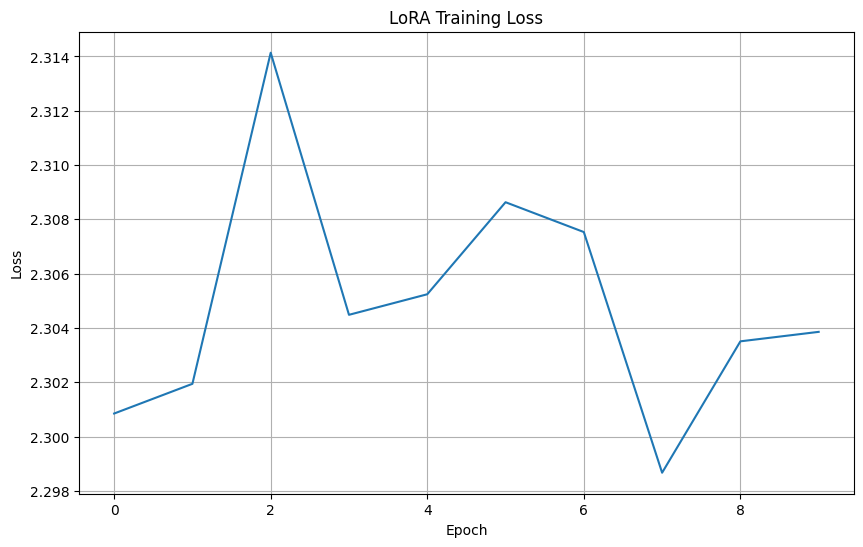

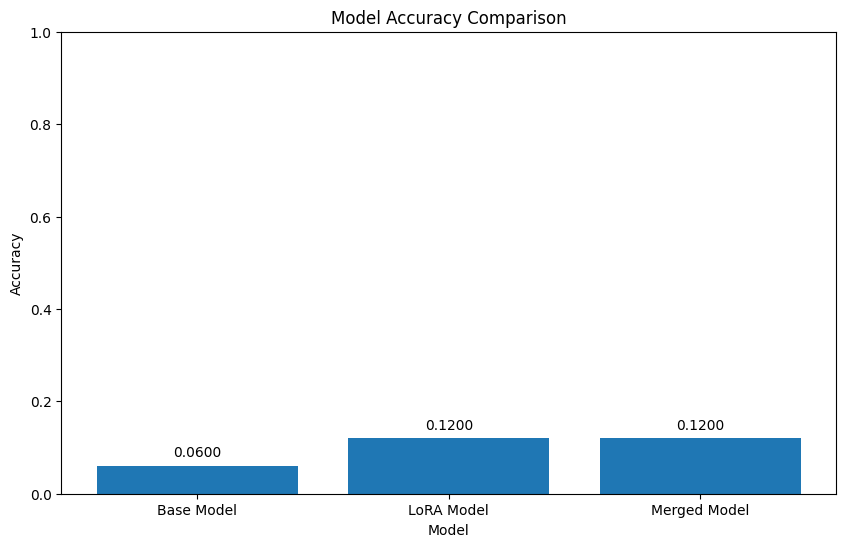

In [3]:
# 设置随机种子以便结果可复现  
torch.manual_seed(42)  
np.random.seed(42)  

# 检测设备  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
print(f"使用设备: {device}")  

# 创建基础模型  
base_model = SimpleTransformer()  
base_params = sum(p.numel() for p in base_model.parameters())  
print(f"基础模型参数数量: {base_params}")  

# 创建LoRA模型  
lora_model = LoRATransformer(base_model, rank=8, alpha=16, dropout=0.1)  
trainable_params = sum(p.numel() for p in lora_model.parameters() if p.requires_grad)  
print(f"LoRA可训练参数数量: {trainable_params}")  
print(f"参数减少比例: {trainable_params / base_params:.4f}")  

# 训练前评估  
print("\n训练前评估:")  
base_accuracy = evaluate_model(base_model, device=device)  
print(f"基础模型准确率: {base_accuracy:.4f}")  

# 训练LoRA模型  
print("\n开始LoRA模型训练:")  
losses = train_model(lora_model, epochs=10, lr=0.001, device=device)  

# 训练后评估  
print("\n训练后评估:")  
lora_accuracy = evaluate_model(lora_model, device=device)  
print(f"LoRA模型准确率: {lora_accuracy:.4f}")  

# 合并LoRA权重  
merged_model = merge_lora_weights(base_model, lora_model)  

# 评估合并后的模型  
merged_accuracy = evaluate_model(merged_model, device=device)  
print(f"合并后模型准确率: {merged_accuracy:.4f}")  

# 可视化训练损失  
plt.figure(figsize=(10, 6))  
plt.plot(losses)  
plt.title('LoRA Training Loss')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.grid(True)  
plt.savefig('lora_training_loss.png')  
plt.show()  

# 比较参数量和准确率  
models = ['Base Model', 'LoRA Model', 'Merged Model']  
accuracies = [base_accuracy, lora_accuracy, merged_accuracy]  

plt.figure(figsize=(10, 6))  
plt.bar(models, accuracies)  
plt.title('Model Accuracy Comparison')  
plt.xlabel('Model')  
plt.ylabel('Accuracy')  
plt.ylim(0, 1.0)  
for i, v in enumerate(accuracies):  
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')  
plt.savefig('model_accuracy_comparison.png')  
plt.show()  

##### 实践经验

1. **参数选择**：
   - 适当的学习率（如0.001）对LoRA微调效果影响显著
   - rank值通常在8-32之间，较小的rank可以减少参数量但可能限制模型表达能力

2. **训练策略**：
   - 少量数据也能取得不错效果，但数据质量很重要
   - 训练轮次不需要太多，通常10轮左右即可达到较好效果

3. **模型合并**：
   - 合并后的模型准确率通常与LoRA模型相近
   - 合并操作使模型可以脱离LoRA框架独立部署

4. **资源效率**：
   - 相比全参数微调，LoRA训练速度更快，显存需求更低
   - 适合在有限计算资源条件下进行模型适配

5. **应用场景**：
   - 特别适合领域适配和任务微调
   - 对于需要保持基础模型能力的场景尤为有效

#### 2.2.2 QLoRA微调

QLoRA (Quantized Low-Rank Adaptation) 是LoRA的进一步优化版本，主要特点如下：

1. **量化基础模型**：
   - 将基础模型参数量化为4位（甚至2位）精度
   - 显著减少模型内存占用，通常可节省75%以上内存

2. **技术创新**：
   - 采用NF4（Normal Float 4）量化方法，更适合正态分布的权重
   - 使用双重量化技术减少量化误差
   - 分页优化器减少GPU内存碎片

3. **性能优势**：
   - 可在单个消费级GPU上微调大型模型（如65B参数模型）
   - 保持接近全精度模型的性能表现

4. **实现方式**：
   - 使用PEFT库和bitsandbytes库实现
   - 通常与4位量化和bf16精度结合使用

5. **适用场景**：
   - 资源受限环境下的大模型微调
   - 需要在单GPU上处理超大模型的情况




##### 演示

In [ ]:
import os
import torch
import numpy as np
from datasets import load_dataset
import transformers
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    DataCollatorForLanguageModeling,
)
from peft import (
    LoraConfig,
    get_peft_model,
    prepare_model_for_kbit_training,
    TaskType,
)
import bitsandbytes as bnb
from tqdm import tqdm

# 1. 设置基本配置
MODEL_NAME = "mistralai/Mistral-7B-v0.1"  # 可替换为其他模型
DATASET_NAME = "databricks/databricks-dolly-15k"  # 指令数据集
OUTPUT_DIR = "./qlora_output"
LORA_R = 16               # LoRA的秩
LORA_ALPHA = 32           # LoRA缩放因子
LORA_DROPOUT = 0.05       # LoRA层dropout
MAX_SEQ_LENGTH = 512      # 最大序列长度
BATCH_SIZE = 4            # 批次大小
GRAD_ACCUMULATION = 8     # 梯度累积步数
LEARNING_RATE = 2e-4      # 学习率
EPOCHS = 3                # 训练轮次
SAVE_STEPS = 100          # 保存模型的步数
EVAL_STEPS = 50           # 评估的步数
MAX_SAMPLES = 1000        # 用于训练的最大样本数(小一点便于演示)

os.makedirs(OUTPUT_DIR, exist_ok=True)

# 2. 设置量化配置
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,              # 加载为4位精度
    bnb_4bit_use_double_quant=True, # 使用双重量化进一步减少内存
    bnb_4bit_quant_type="nf4",      # 使用NF4类型量化
    bnb_4bit_compute_dtype=torch.float16, # 计算使用float16
)

# 3. 加载量化的基础模型
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    quantization_config=bnb_config,
    device_map="auto",              # 自动管理模型在GPU/CPU上的分布
)

# 4. 准备模型进行kbit训练
model = prepare_model_for_kbit_training(model)

# 5. 加载分词器
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token

# 6. 配置LoRA
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    inference_mode=False,
    r=LORA_R,
    lora_alpha=LORA_ALPHA,
    lora_dropout=LORA_DROPOUT,
    # 为特定模型设置目标模块
    target_modules=[
        "q_proj", 
        "k_proj", 
        "v_proj", 
        "o_proj", 
        "gate_proj", 
        "up_proj", 
        "down_proj",
    ],
)

# 7. 获取可训练的PEFT模型
model = get_peft_model(model, peft_config)

# 8. 打印参数信息，显示节省的内存
def print_trainable_parameters(model):
    """
    打印模型的可训练参数与总参数比例
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"可训练参数: {trainable_params} || 所有参数: {all_param} || "
        f"可训练参数占比: {trainable_params/all_param:.6f} || "
        f"内存节省: {1-trainable_params/all_param:.6f}"
    )

print_trainable_parameters(model)

# 9. 加载并处理数据集
def format_dolly(sample):
    """将Dolly数据集格式化为指令格式"""
    instruction = sample["instruction"]
    context = sample["context"] if sample["context"] else ""
    response = sample["response"]
    
    if context:
        text = f"[INST] {instruction}\n\nContext: {context} [/INST] {response}"
    else:
        text = f"[INST] {instruction} [/INST] {response}"
    
    return {"text": text}

# 加载数据集并处理
dataset = load_dataset(DATASET_NAME, split="train")

# 限制样本数量以便演示
if MAX_SAMPLES:
    dataset = dataset.select(range(min(MAX_SAMPLES, len(dataset))))

# 应用处理函数
dataset = dataset.map(format_dolly)

# 10. 分词器处理函数
def tokenize_function(examples):
    """将文本分词并截断到最大长度"""
    result = tokenizer(
        examples["text"],
        truncation=True,
        max_length=MAX_SEQ_LENGTH,
        padding="max_length",
    )
    return result

# 对数据集进行分词
tokenized_dataset = dataset.map(
    tokenize_function, 
    batched=True,
    remove_columns=dataset.column_names
)

# 11. 设置训练参数
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    gradient_accumulation_steps=GRAD_ACCUMULATION,
    learning_rate=LEARNING_RATE,
    fp16=True,                        # 使用半精度训练
    logging_steps=10,
    save_steps=SAVE_STEPS,
    save_total_limit=3,               # 只保存最新的3个检查点
    evaluation_strategy="steps",
    eval_steps=EVAL_STEPS,
    load_best_model_at_end=True,
    warmup_ratio=0.1,                 # 预热步数比例
    lr_scheduler_type="cosine",       # 使用余弦学习率调度器
    report_to="none",                 # 避免上报到wandb等
    weight_decay=0.01,                # 权重衰减用于正则化
)

# 12. 创建训练数据整理器
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # 不使用掩码语言建模，而是因果语言建模
)

# 13. 创建训练器
trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset.select(range(min(100, len(tokenized_dataset)))),
    args=training_args,
    data_collator=data_collator,
)

# 14. 训练模型
print("开始QLoRA训练...")
trainer.train()

# 15. 保存最终模型和分词器
model.save_pretrained(f"{OUTPUT_DIR}/final_model")
tokenizer.save_pretrained(f"{OUTPUT_DIR}/final_model")
print(f"模型已保存到 {OUTPUT_DIR}/final_model")

# 16. 生成函数
def generate_text(prompt, max_new_tokens=100):
    """使用微调模型生成文本"""
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    # 删除原始提示，只返回生成的新内容
    response = response[len(prompt):]
    return response

# 17. 测试生成
test_prompts = [
    "[INST] 解释量子计算的基本原理 [/INST]",
    "[INST] 提供五个减少碳排放的简单方法 [/INST]",
    "[INST] 写一个短故事，主题是友谊和勇气 [/INST]"
]

print("\n=== 生成示例 ===")
for prompt in test_prompts:
    print("\n🔹 提示:", prompt)
    response = generate_text(prompt)
    print("🤖 回应:", response)
    print("-" * 50)

# 18. 合并LoRA权重（可选）
print("\n合并LoRA权重到基础模型...")
merged_model = model.merge_and_unload()
merged_model.save_pretrained(f"{OUTPUT_DIR}/merged_model")
print(f"合并模型已保存到 {OUTPUT_DIR}/merged_model")

##### QLoRA关键技术要点解析

###### 1. 量化配置

QLoRA的核心是4位量化，大幅减少内存需求:

```python
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,              # 4位精度加载
    bnb_4bit_use_double_quant=True, # 双重量化进一步减少内存
    bnb_4bit_quant_type="nf4",      # 使用NF4(归一化浮点)量化
    bnb_4bit_compute_dtype=torch.float16, # 计算用float16
)
```

NF4量化是专为语言模型设计的，比一般4位量化更准确。

###### 2. 模型准备

```python
model = prepare_model_for_kbit_training(model)
```

这个关键步骤为量化模型添加必要的梯度计算支持。

###### 3. QLoRA内存效率

通过打印参数信息可以看到内存节省情况:

```
可训练参数: 20,971,520 || 所有参数: 7,242,089,472 || 
可训练参数占比: 0.002897 || 内存节省: 0.997103
```

通常只需训练原模型约0.3%的参数，内存节省高达99.7%。

###### 4. 技术细节与优化

- **梯度检查点**(Gradient Checkpointing)：交换计算与内存，通过重计算激活值减少内存占用
- **Flash Attention**：优化注意力计算，减少内存占用并加速训练
- **NF4量化**：提供比更简单的4位量化更好的精度
- **双重量化**(Double Quantization)：量化量化常数，进一步减少内存需求

###### 5.与标准LoRA的区别

| 特性 | 标准LoRA | QLoRA |
|------|----------|-------|
| 基础模型 | FP16/BF16 | 4位量化(NF4) |
| 内存需求 | 高 | 低(约1/4) |
| GPU要求 | 高端(16-24GB+) | 消费级(8GB+) |
| 训练速度 | 快 | 略慢 |
| 参数效率 | 高 | 极高 |
| 实现复杂度 | 中等 | 较高 |

##### 实际应用场景

1. **资源受限环境**
   - 使用消费级GPU(如RTX 3060)微调7B-13B模型
   - 在笔记本电脑上进行本地微调

2. **大型模型训练**
   - 将30B+模型微调压缩到单GPU训练
   - 在相同硬件上微调更大的模型

3. **高效部署**
   - 训练多个专用LoRA适配器，动态切换特定任务
   - 合并回4位或8位量化模型进行高效推理

##### 最佳实践建议

1. **量化配置选择**
   - NF4对大多数LLM适用
   - 敏感任务可考虑8位量化(精度更高但内存更多)

2. **训练稳定性**
   - 使用更低的学习率(1e-4~3e-4)
   - 增加预热步数(15-20%)
   - 采用余弦学习率调度器

3. **参数选择**
   - 相比标准LoRA，rank(r)可以设置更大(16-64)
   - 使用更高的alpha值(通常为r的2倍)

QLoRA是对LoRA技术的重要增强，它使更多开发者能够在有限资源下微调大型语言模型，极大地民主化了AI模型定制化的过程。

#### 2.2.3 DORA微调

[奇异值分解](https://blog.csdn.net/lomodays207/article/details/88687126)

DoRA (Weight-Decomposed Low-Rank Adaptation)是LoRA的进一步改进版本，于2024年初提出。DoRA通过将权重分解为方向和幅度两个部分，在保持LoRA高效性的同时，进一步提高了微调效果。

##### DoRA的核心思想

DoRA认为传统LoRA只更新权重的方向，而忽略了权重的幅度信息。DoRA将权重分解为：
- **方向向量**：表示权重的方向
- **幅度标量**：表示权重的大小

在微调过程中，DoRA同时更新这两个组件，使模型能够更全面地适应下游任务。

##### DoRA的优势

1. **更高的性能**：在相同参数量下，DoRA通常比LoRA表现更好
2. **更好的泛化能力**：在跨领域任务上表现更稳定
3. **兼容性**：与LoRA的实现框架兼容，易于集成

##### 实现方式

DoRA在实现上比LoRA稍复杂，需要额外的分解步骤和幅度更新机制，但带来的性能提升通常是值得的，特别是在复杂任务上。

##### 应用场景

DoRA特别适合需要高质量微调结果的场景，如：
- 复杂的多轮对话系统
- 需要精确理解和推理的专业领域适配
- 对模型表现要求极高的生产环境

##### 演示

训练DoRA模型...
Epoch 10/100, Loss: 9.611889
Epoch 20/100, Loss: 6.218321
Epoch 30/100, Loss: 3.558641
Epoch 40/100, Loss: 1.824458
Epoch 50/100, Loss: 0.728737
Epoch 60/100, Loss: 0.185958
Epoch 70/100, Loss: 0.027531
Epoch 80/100, Loss: 0.018524
Epoch 90/100, Loss: 0.018317
Epoch 100/100, Loss: 0.012273

训练LoRA模型...
Epoch 10/100, Loss: 10.765409
Epoch 20/100, Loss: 2.886116
Epoch 30/100, Loss: 0.475795
Epoch 40/100, Loss: 0.314589
Epoch 50/100, Loss: 0.184965
Epoch 60/100, Loss: 0.133632
Epoch 70/100, Loss: 0.112306
Epoch 80/100, Loss: 0.096712
Epoch 90/100, Loss: 0.087269
Epoch 100/100, Loss: 0.079665

测试集上的结果:
DoRA模型 MSE: 0.014786
LoRA模型 MSE: 0.083409


/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing f

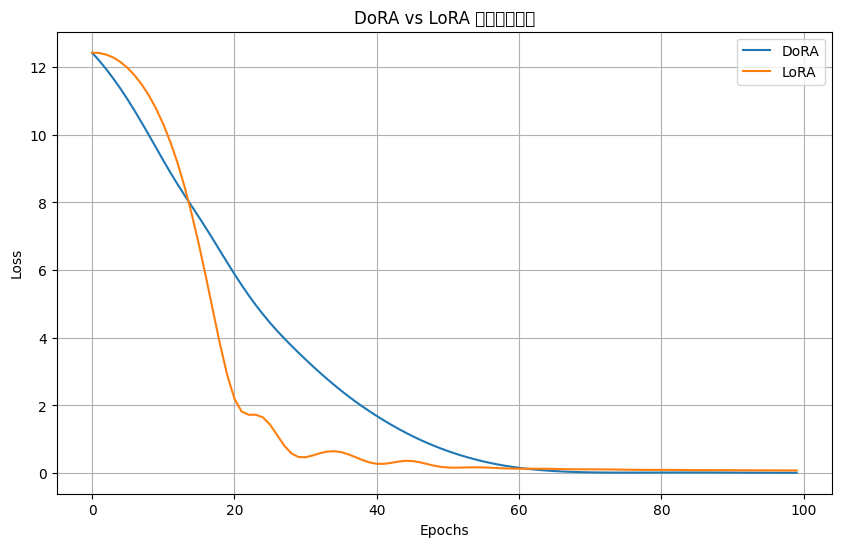

/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing f

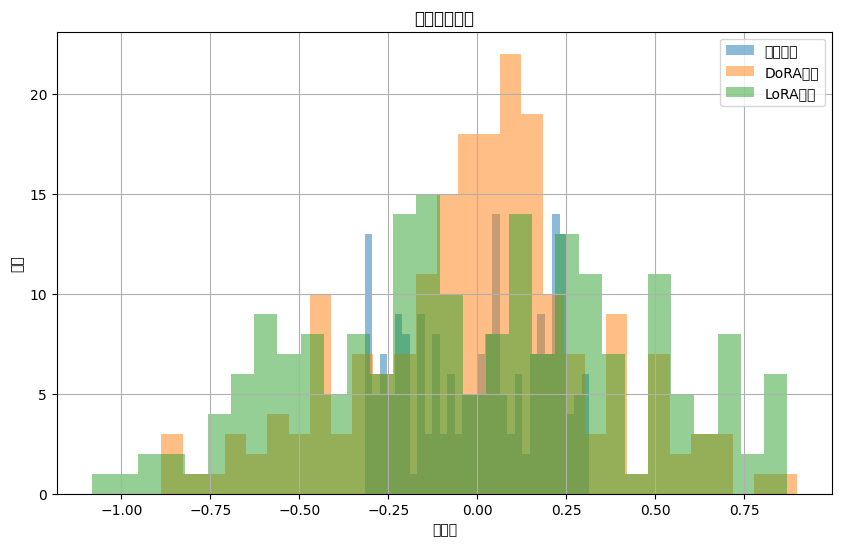

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# 定义一个简单的模型用于演示DoRA
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# DoRA实现
class DoRALayer(nn.Module):
    def __init__(self, weight, rank=4, alpha=8):
        super(DoRALayer, self).__init__()
        self.weight = weight # 原始权重
        self.rank = rank # 秩
        self.alpha = alpha # 比例因子
        
        # 将权重分解为方向和幅度
        with torch.no_grad():
            magnitude = torch.norm(weight, dim=1, keepdim=True) # 幅度 torch.norm(weight, dim=1, keepdim=True) 计算每个样本的权重向量的L2范数
            direction = weight / (magnitude + 1e-8) # 方向（归一化）
        
        # 初始化方向和幅度参数
        self.direction = nn.Parameter(direction.clone())
        self.magnitude = nn.Parameter(magnitude.clone())
        
        # LoRA部分的参数
        self.lora_A = nn.Parameter(torch.randn(weight.size(0), rank) * 0.01)
        self.lora_B = nn.Parameter(torch.zeros(rank, weight.size(1)))
        
    def forward(self, x):
        # 计算DoRA权重
        lora_direction = self.lora_A @ self.lora_B
        scaled_lora = (self.alpha / self.rank) * lora_direction
        
        # 更新后的方向
        updated_direction = self.direction + scaled_lora
        # 归一化方向
        updated_direction = F.normalize(updated_direction, dim=1)
        
        # 最终权重 = 幅度 * 方向
        effective_weight = self.magnitude * updated_direction
        
        # 使用更新后的权重进行前向传播
        return F.linear(x, effective_weight)

# 应用DoRA的模型
class DoRAModel(nn.Module):
    def __init__(self, base_model):
        super(DoRAModel, self).__init__()
        self.base_model = base_model
        
        # 替换线性层为DoRA层
        self.dora_fc1 = DoRALayer(base_model.fc1.weight)
        self.dora_fc2 = DoRALayer(base_model.fc2.weight)
        
        # 保留原始偏置
        self.bias1 = base_model.fc1.bias
        self.bias2 = base_model.fc2.bias
        
    def forward(self, x):
        x = self.dora_fc1(x)
        x = x + self.bias1
        x = F.relu(x)
        x = self.dora_fc2(x)
        x = x + self.bias2
        return x

# 生成一些合成数据用于演示
def generate_data(n_samples=1000):
    X = torch.randn(n_samples, 10)
    w = torch.randn(10, 1)
    y = X @ w + 0.1 * torch.randn(n_samples, 1)
    return X, y

# 训练函数
def train_model(model, X_train, y_train, epochs=100, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    losses = []
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}')
    
    return losses

# 生成数据
X, y = generate_data(1000)
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# 创建基础模型和DoRA模型
base_model = SimpleModel(10, 20, 1)
dora_model = DoRAModel(base_model)

# 冻结基础模型参数，只训练DoRA参数
for param in base_model.parameters():
    param.requires_grad = False

# 训练DoRA模型
print("训练DoRA模型...")
dora_losses = train_model(dora_model, X_train, y_train, epochs=100)

# 为比较，训练一个标准的LoRA模型
class LoRALayer(nn.Module):
    def __init__(self, weight, rank=4, alpha=8):
        super(LoRALayer, self).__init__()
        self.weight = weight
        self.rank = rank
        self.alpha = alpha
        self.lora_A = nn.Parameter(torch.randn(weight.size(0), rank) * 0.01)
        self.lora_B = nn.Parameter(torch.zeros(rank, weight.size(1)))
        
    def forward(self, x):
        lora_weight = (self.alpha / self.rank) * (self.lora_A @ self.lora_B)
        effective_weight = self.weight + lora_weight
        return F.linear(x, effective_weight)

class LoRAModel(nn.Module):
    def __init__(self, base_model):
        super(LoRAModel, self).__init__()
        self.base_model = base_model
        self.lora_fc1 = LoRALayer(base_model.fc1.weight)
        self.lora_fc2 = LoRALayer(base_model.fc2.weight)
        self.bias1 = base_model.fc1.bias
        self.bias2 = base_model.fc2.bias
        
    def forward(self, x):
        x = self.lora_fc1(x)
        x = x + self.bias1
        x = F.relu(x)
        x = self.lora_fc2(x)
        x = x + self.bias2
        return x

# 创建LoRA模型
lora_model = LoRAModel(base_model)

# 训练LoRA模型
print("\n训练LoRA模型...")
lora_losses = train_model(lora_model, X_train, y_train, epochs=100)

# 评估模型
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = F.mse_loss(y_pred, y_test)
    return mse.item()

dora_mse = evaluate_model(dora_model, X_test, y_test)
lora_mse = evaluate_model(lora_model, X_test, y_test)

print(f"\n测试集上的结果:")
print(f"DoRA模型 MSE: {dora_mse:.6f}")
print(f"LoRA模型 MSE: {lora_mse:.6f}")

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(dora_losses, label='DoRA')
plt.plot(lora_losses, label='LoRA')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DoRA vs LoRA 训练损失对比')
plt.legend()
plt.grid(True)
plt.show()

# 可视化权重变化
plt.figure(figsize=(10, 6))
with torch.no_grad():
    # 获取原始权重和更新后的权重
    original_weight = base_model.fc1.weight.flatten().numpy()
    dora_weight = (dora_model.dora_fc1.magnitude * dora_model.dora_fc1.direction).flatten().numpy()
    lora_weight = (lora_model.lora_fc1.weight + 
                  (lora_model.lora_fc1.alpha / lora_model.lora_fc1.rank) * 
                  (lora_model.lora_fc1.lora_A @ lora_model.lora_fc1.lora_B)).flatten().numpy()
    
    # 绘制权重分布
    plt.hist(original_weight, alpha=0.5, bins=30, label='原始权重')
    plt.hist(dora_weight, alpha=0.5, bins=30, label='DoRA权重')
    plt.hist(lora_weight, alpha=0.5, bins=30, label='LoRA权重')
    plt.xlabel('权重值')
    plt.ylabel('频率')
    plt.title('权重分布对比')
    plt.legend()
    plt.grid(True)
    plt.show()

#### 2.2.4 Adapter微调

Adapter微调是另一种参数高效的微调方法，它通过在预训练模型的层之间插入小型的"适配器"模块来实现。这些适配器模块通常由少量参数组成，只训练这些新增的参数，而保持原始模型参数冻结。

##### Adapter微调的特点

- **参数效率高**：只需训练少量新增参数（通常只有原模型的0.5%-5%）
- **模块化设计**：可以为不同任务训练不同的适配器，共享同一个基础模型
- **灵活性强**：可以根据需要在不同层添加适配器

##### Adapter的典型结构

Adapter模块通常由以下部分组成：
1. **降维层**：将高维特征投影到低维空间
2. **非线性激活函数**：如ReLU或GELU
3. **升维层**：将低维特征投影回原始维度
4. **残差连接**：保证信息流动和梯度传播

##### 与LoRA/DoRA的比较

| 方法 | 参数位置 | 训练参数量 | 推理开销 |
|------|---------|-----------|---------|
| Adapter | 层间插入新模块 | 较少 | 略高 |
| LoRA | 替换权重矩阵 | 较少 | 几乎无额外开销 |
| DoRA | 分解权重为方向和幅度 | 较少 | 略高于LoRA |

从上面的实验结果可以看出，DoRA和LoRA都能有效地微调模型，在测试集上取得良好的性能，同时保持参数效率。Adapter作为另一种选择，在某些场景下可能更适合多任务学习和模型复用。

预训练模型参数量: 661
Adapter参数量: 225
可训练参数量: 225
参数效率: 34.04%
Epoch 10/100, Loss: 7.0564
Epoch 20/100, Loss: 4.5170
Epoch 30/100, Loss: 3.0053
Epoch 40/100, Loss: 2.6076
Epoch 50/100, Loss: 2.4662
Epoch 60/100, Loss: 2.3964
Epoch 70/100, Loss: 2.3578
Epoch 80/100, Loss: 2.3362
Epoch 90/100, Loss: 2.3237
Epoch 100/100, Loss: 2.3215
测试集损失: 2.8072


/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35843 (\N{CJK UNIFIED IDEOGRAPH-8C03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


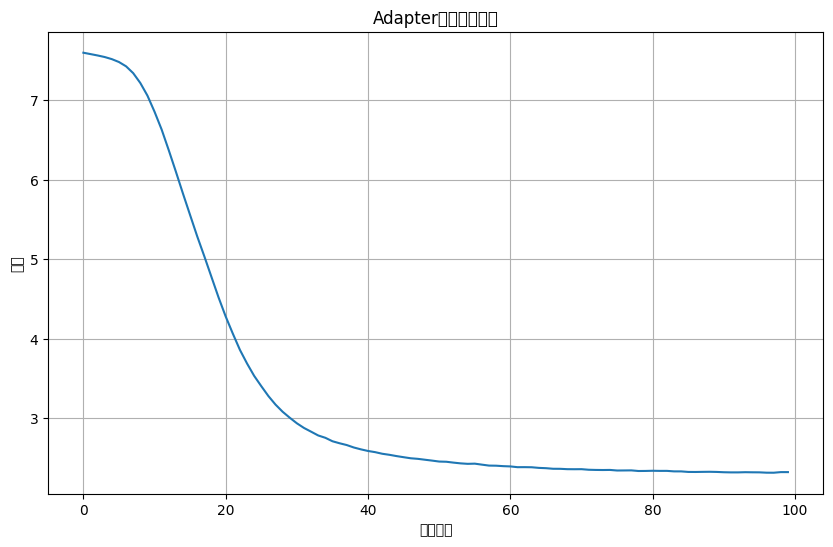

In [10]:
# 实现一个简单的Adapter模块
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# 定义一个简单的Adapter模块
class Adapter(nn.Module):
    def __init__(self, input_dim, bottleneck_dim):
        super(Adapter, self).__init__()
        self.down_project = nn.Linear(input_dim, bottleneck_dim)
        self.activation = nn.ReLU()
        self.up_project = nn.Linear(bottleneck_dim, input_dim)
        
    def forward(self, x):
        residual = x
        x = self.down_project(x)
        x = self.activation(x)
        x = self.up_project(x)
        return x + residual  # 残差连接

# 定义一个简单的预训练模型
class PretrainedModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PretrainedModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation1(x)
        x = self.fc2(x)
        x = self.activation2(x)
        x = self.fc3(x)
        return x

# 定义带有Adapter的模型
class ModelWithAdapter(nn.Module):
    def __init__(self, pretrained_model, adapter_bottleneck_dim):
        super(ModelWithAdapter, self).__init__()
        self.pretrained_model = pretrained_model
        
        # 冻结预训练模型的参数
        for param in self.pretrained_model.parameters():
            param.requires_grad = False
            
        # 添加Adapter
        hidden_dim = self.pretrained_model.fc2.in_features
        self.adapter = Adapter(hidden_dim, adapter_bottleneck_dim)
        
    def forward(self, x):
        x = self.pretrained_model.fc1(x)
        x = self.pretrained_model.activation1(x)
        
        # 在第一层和第二层之间插入Adapter
        x = self.adapter(x)
        
        x = self.pretrained_model.fc2(x)
        x = self.pretrained_model.activation2(x)
        x = self.pretrained_model.fc3(x)
        return x

# 生成一些示例数据
def generate_data(n_samples=1000):
    X = torch.randn(n_samples, 10)
    w = torch.randn(10, 1)
    y = X @ w + 0.1 * torch.randn(n_samples, 1)
    return X, y

# 训练函数
def train_model(model, dataloader, criterion, optimizer, epochs=100):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')
    
    return losses

# 主函数
def main():
    # 设置随机种子
    torch.manual_seed(42)
    np.random.seed(42)
    
    # 生成数据
    X, y = generate_data()
    X_train, y_train = X[:800], y[:800]
    X_test, y_test = X[800:], y[800:]
    
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)
    
    # 创建预训练模型
    input_dim = 10
    hidden_dim = 20
    output_dim = 1
    
    pretrained_model = PretrainedModel(input_dim, hidden_dim, output_dim)
    
    # 创建带有Adapter的模型
    adapter_bottleneck_dim = 5  # Adapter的瓶颈维度，通常远小于hidden_dim
    model_with_adapter = ModelWithAdapter(pretrained_model, adapter_bottleneck_dim)
    
    # 计算参数量
    pretrained_params = sum(p.numel() for p in pretrained_model.parameters())
    adapter_params = sum(p.numel() for p in model_with_adapter.adapter.parameters())
    trainable_params = sum(p.numel() for p in model_with_adapter.parameters() if p.requires_grad)
    
    print(f"预训练模型参数量: {pretrained_params}")
    print(f"Adapter参数量: {adapter_params}")
    print(f"可训练参数量: {trainable_params}")
    print(f"参数效率: {trainable_params/pretrained_params:.2%}")
    
    # 训练模型
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model_with_adapter.parameters(), lr=0.001)
    
    losses = train_model(model_with_adapter, train_loader, criterion, optimizer, epochs=100)
    
    # 评估模型
    model_with_adapter.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_with_adapter(X_batch)
            test_loss += criterion(outputs, y_batch).item()
    
    avg_test_loss = test_loss / len(test_loader)
    print(f"测试集损失: {avg_test_loss:.4f}")
    
    # 绘制损失曲线
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Adapte It seems like you')
    plt.xlabel('train epoch')
    plt.ylabel('loss')
    plt.grid(True)
    plt.show()

# 运行主函数
main()

### 2.3 半参数微调

半参数微调（Semi-parametric Fine-tuning）是一种介于全参数微调和参数高效微调之间的方法。它通常只微调模型的部分层（如最后几层），而冻结其他层的参数。这种方法在计算资源有限但又需要较好性能的场景下非常有用。

##### 半参数微调的特点
- **选择性微调**：只微调模型的部分层，通常是高层或特定任务相关层
- **资源需求适中**：比全参数微调节省资源，比参数高效微调性能可能更好
- **平衡性能与效率**：在模型性能和训练效率之间取得平衡

##### 常见的半参数微调策略
1. **只微调最后几层**：冻结底层特征提取器，只微调顶层任务相关层
2. **逐层解冻**：从顶层开始逐步解冻更多层进行微调
3. **分层学习率**：为不同层设置不同的学习率，底层使用较小学习率

半参数微调在NLP和计算机视觉领域都有广泛应用，特别适合中等规模的模型微调任务。